<a href="https://colab.research.google.com/github/King-04/Python-Ocr/blob/main/lego_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is the most enormous LEGO set ever created and how many parts did it have?

In which year were the first LEGO sets released and how many sets did the company sell when it first launched?

Which LEGO theme has the most sets? Is it Harry Potter, Ninjago, Friends or something else?

When did the LEGO company really take-off based on its product offering? How many themes and sets did it release every year?

Did LEGO sets grow in size and complexity over time? Do older LEGO sets tend to have more or fewer parts than newer sets?



<img src="https://i.imgur.com/49FNOHj.jpg">

#Import statements

In [2]:
import pandas as pd


In [4]:
colors = pd.read_csv('/content/data/colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [5]:
colors['name'].nunique()

135

In [6]:
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [7]:
colors.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

### Understanding LEGO themes vs LEGO sets
Walk into a leg store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.
<img src="https://i.imgur.com/aKcwkSx.png">

A lego **set** is a particular box of LEGO or product. Therefore a single theme typically has many different sets.
<img src="https://e1.pxfuel.com/desktop-wallpaper/442/440/desktop-wallpaper-the-best-lego-star-wars-sets-2022.jpg">

Read csv and look at first and last couple of rows

In [8]:
sets = pd.read_csv('/content/data/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [9]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In which year were the first LEGO sets released and what were these sets called?


In [10]:
sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


How many different products did the LEGO company sell in their first year of operation?

In [11]:
sets[sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


What are the top 5 LEGO sets with the most number of parts?

In [12]:
sets.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [13]:
import pandas as pd
import matplotlib.pyplot as plt


Grouping sets by the year

In [14]:
sets_by_year = sets.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [15]:
sets_by_year['set_num'].tail()

year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

sets per year plots

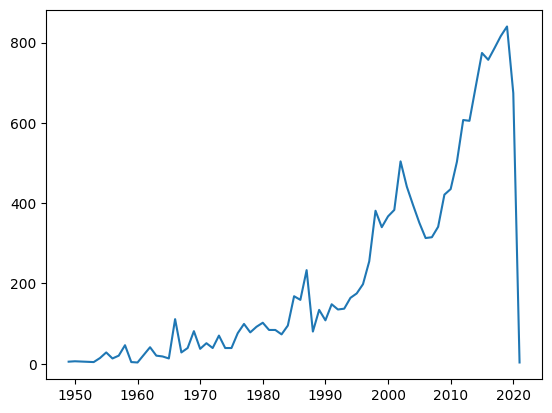

In [16]:
plt.plot(sets_by_year.index, sets_by_year.set_num)

Rmoving data for the last two years

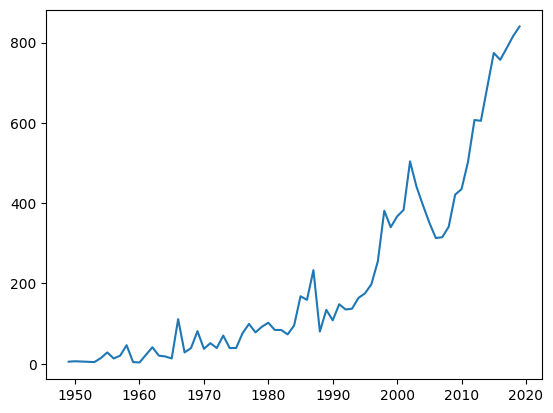

In [17]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

**Aggregate data:** calculate the number of different themes by calendar year

In [22]:
themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year.rename(columns = {'theme_id' : 'nr_themes'}, inplace = True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [23]:
themes_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


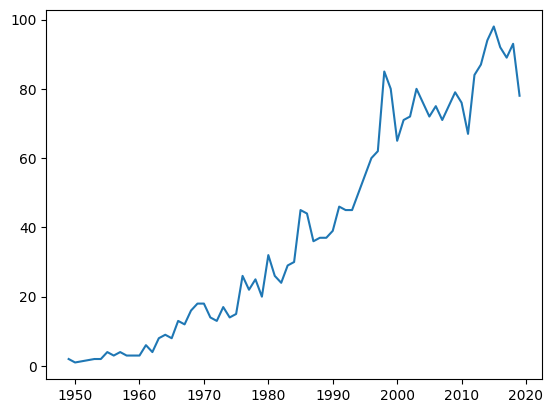

In [25]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

plotting usin two different axes

Text(0, 0.5, 'Number of themes')

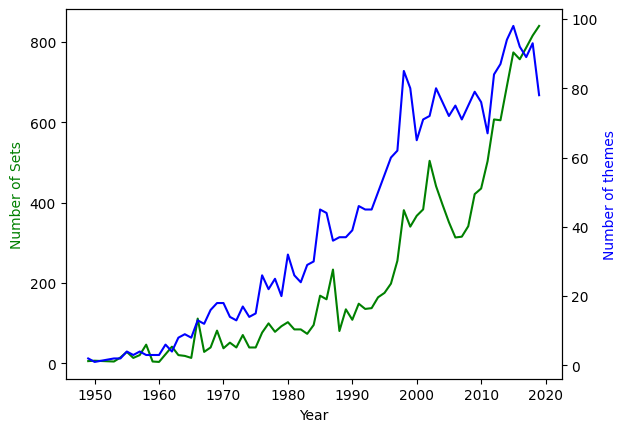

In [31]:
ax1 = plt.gca() #get current axes
ax2 = ax1.twinx() #create another axis that share the same x-axis

ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color='g')
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], 'b')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of themes', color='blue')